In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import pandas as pd
import gzip
import os
import matplotlib.cm as cmx
from itertools import compress
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
fingerdir = 'data/results_chr21/k3/mean/' #select fingerprint directory
popdir = 'data/' #select population csv directory
filelist = os.listdir(fingerdir) #load all fingerprints in the directory
populations = pd.read_csv(popdir + 'actual_sample_names.csv').iloc[:, :2] #grab population information

popDict = populations.set_index('Sample').T.to_dict('records')[0] #turn populations into a directory

In [55]:
def extract(fc): #Extracts fingerprint array values form fingerprint
    b = int(np.array(fc.split()[0]))              #uncomment
    a = np.array(list(map(float, fc.split()[2:]))) #2
    return(a)

def findGood(fc): #ensures only fingerprint of specified length (20) is extracted
    n = 20
    b = int(np.array(fc.split()[0]))
    return n == b

fingers = []
y = []
for file in filelist:
    if not file.endswith(".outn.gz"): #extract normalized fingerprints
        continue
    y.append(popDict[file.split('.')[0]])
    with gzip.open(fingerdir + file, 'rb') as f: #read from gzipped file
        file_content = f.readlines()[10:] 
        #print(file_content)
        good = np.array(list(map(findGood, file_content)))
        file_content = list(compress(file_content, good))
        
        vals = np.array(list(map(extract, file_content))).flatten() #extracts fingerprint as flattened feature vecotr
        fingers.append(vals)
        
fingers = np.array(fingers) 
yorig = np.array(y)
print(fingers.shape)
print(yorig.shape)
print(y)

(614, 34560)
(614,)
['CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'PUR', 'PUR', 'PUR', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'PUR', 'PUR', 'PUR', 'PUR', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'CHS', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR', 'PUR',

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

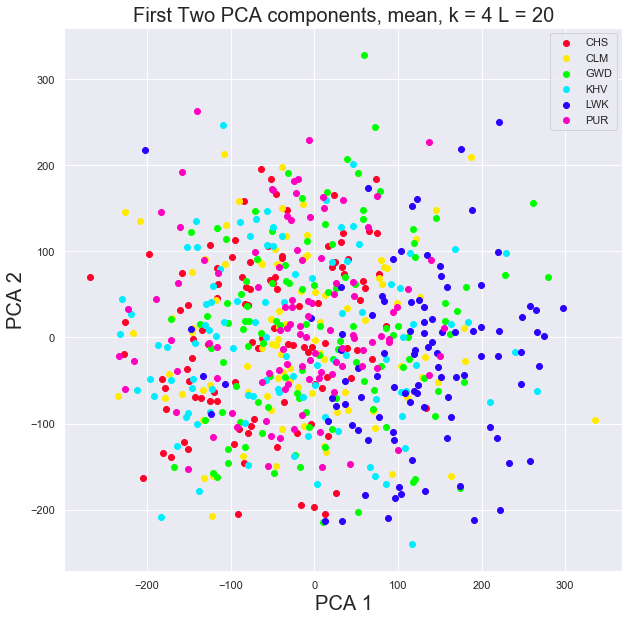

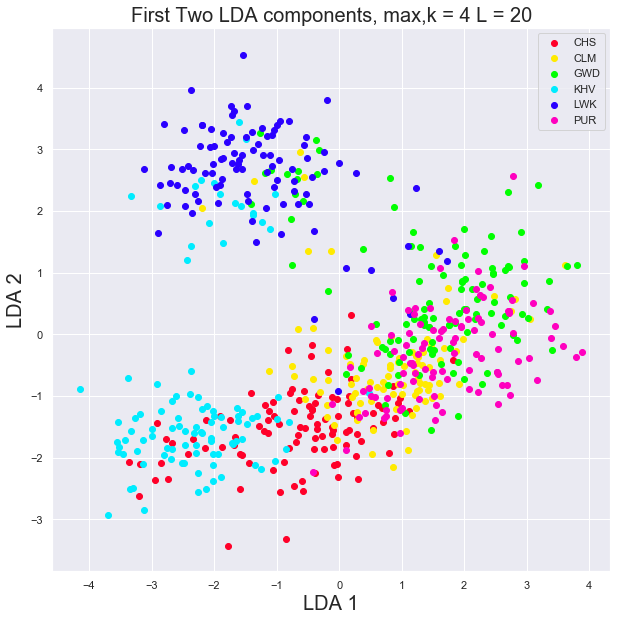

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
fing = fingers.copy()
y = yorig.copy()
scale = True 

if scale: #standardize fingerprints with 0 mean and 1 std dev 
    scaler = StandardScaler()
    scaler.fit(fing)
    fing = scaler.transform(fing)

pca = PCA(n_components=100, whiten = False) # reduce dimensionality to 100 features
fing = pca.fit_transform(fing)
pcad = fing
uniq = np.unique(y)

lda = LinearDiscriminantAnalysis(n_components = 5) #find 5 dimensions that maximize separation b/w classes
fing = lda.fit(fing, y).transform(fing)

cmap = plt.get_cmap('gist_rainbow')
colors = cmap(np.linspace(0, 1, len(uniq)))

plt.figure(figsize = (10, 10)) #plots first 2 principal components colored by each population
i = 0
for pop in uniq:
    f = pcad[y == pop, :]
    plt.scatter(f[:, 0], f[:, 1], c = colors[i], label = pop)
    i = i + 1

plt.title("First Two PCA components, mean, k = 4 L = 20", size = 20)
plt.xlabel("PCA 1", size = 20)
plt.ylabel("PCA 2", size = 20)
    
plt.legend()
plt.savefig("k4meanpcaplot.png", bbox_inches = 'tight')

plt.figure(figsize = (10, 10)) #plots first 2 lda components colored by each population
i = 0
for pop in uniq:
    f = fing[y == pop, :]
    plt.scatter(f[:, 0], f[:, 1], c = colors[i], label = pop)
    i = i + 1

plt.title("First Two LDA components, max,k = 4 L = 20", size = 20)
plt.xlabel("LDA 1", size = 20)
plt.ylabel("LDA 2", size = 20)
    
plt.legend()
plt.savefig("k4meanldaplot.png", bbox_inches = 'tight') #save figure

In [53]:
from scipy.stats import spearmanr

fing = fingers.copy()
y = yorig.copy()

scale = True #standardize to 0 mean and 1 var
if scale:
    scaler = StandardScaler()
    scaler.fit(fing)
    fing = scaler.transform(fing)
pca = PCA(n_components=100, whiten = False) #reduce via PCA to 100 dimensions
fing = pca.fit_transform(fing)
print(fing.shape)
lda = LinearDiscriminantAnalysis(n_components = 5) #find 5 dimensions that maximize class separation
fing = lda.fit(fing, y).transform(fing)
print(fing.shape)
uniq = np.unique(y)
popmean = np.zeros((fing.shape[1], uniq.shape[0]))

i = 0 #compute mean of each class
for pop in uniq:
    popmean[:, i] = np.mean(fing[y == pop, :], axis = 0)
    i = i+1

i = 0 #compute correlation between each individual and every population fingerprint
corrs = np.zeros((fing.shape[0], uniq.shape[0]))
for pop in uniq:
    print(popmean.shape)
    for r in np.arange(fing.shape[0]):
        out, _ = spearmanr(fing[r, :], popmean[:, i].T)
        corrs[r, i] = out
    i = i + 1

predY = np.argmax(corrs, axis = 1) #"classify" each patient as whichever population they have the highest correlation with
print(predY.shape)
predY = uniq[predY]
print(np.mean(predY == y))
    
    
    
    

(614, 100)
(614, 5)
(5, 6)
(5, 6)
(5, 6)
(5, 6)
(5, 6)
(5, 6)
(614,)
0.6302931596091205


['CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS'
 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS'
 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS'
 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'PUR' 'PUR' 'PUR' 'CHS' 'CHS' 'CHS'
 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS'
 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS'
 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'PUR' 'PUR' 'PUR' 'PUR'
 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS'
 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS' 'CHS'
 'CHS' 'CHS' 'CHS' 'CHS' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR'
 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR'
 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR'
 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR'
 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'PUR' 'CLM' 'CLM' 'C

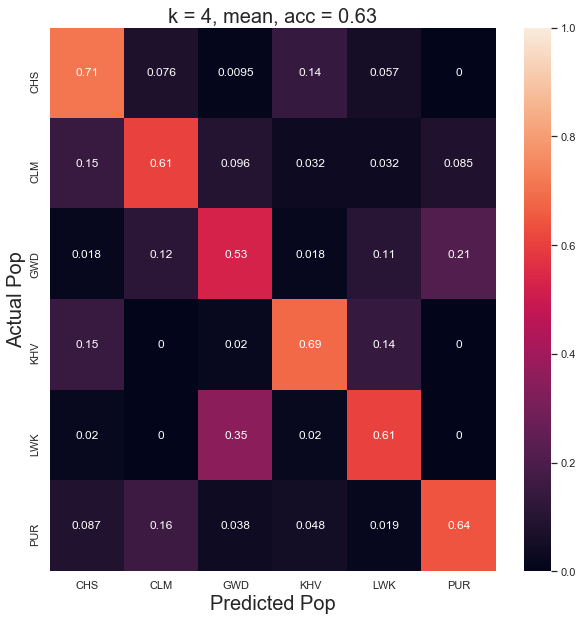

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(rc={'figure.figsize':(10,10)})
print(y)
print(predY)
print(np.sum(y == 'GWD'))
cm = confusion_matrix(y, predY).astype(float) #computes confusion matrix
print(cm)
print(np.sum(cm[2, :]))
for r in np.arange(cm.shape[0]): #normalizes confusion matrix based so that sum of each target class is 1
    print(cm[r, :]/np.sum(cm[r, :]))
    cm[r, :] = cm[r, :] / np.sum(cm[r, :])
print(cm)
ax = sns.heatmap(cm, yticklabels=uniq, xticklabels=uniq, vmax = 1, annot=cm) #plots heatmap
ax.set_title("k = 4, mean, acc = " + str(round(np.mean(predY == y), 2)), size = 20)
ax.set_xlabel("Predicted Pop", size = 20)
ax.set_ylabel("Actual Pop", size = 20)
plt.savefig('k4meanResults.png', bbox_inches = 'tight') #saves result